<a href="https://colab.research.google.com/github/MarManja/SP/blob/main/Regresi%C3%B3n_lineal_multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Cargar archivo csv desde el equipo
from google.colab import files
files.upload()

In [ ]:
#¢Convertir en detaframe
data=pd.read_csv("PROCESADO_Recoleccion_de_datos_Negocios_IN1002B (1).csv")
data.head(5)

In [ ]:
#Verificamos información del DataFrame
data.info()

In [ ]:
#Analizar categorias de una columna
riesgo_categorias = data.groupby(['Equipo del entrevistador'])['Equipo del entrevistador'].count()
riesgo_categorias

In [ ]:
#Eliminar un signo de una columna
data['Equipo del entrevistador']=data['Equipo del entrevistador'].str.replace('EQUIPO ', '')
data['Equipo del entrevistador']=data['Equipo del entrevistador'].str.replace('Equipo ', '')
data['Equipo del entrevistador']=data['Equipo del entrevistador'].str.replace('Equipo', '')
data['Equipo del entrevistador']=data['Equipo del entrevistador'].str.replace('G', '0')
data['Equipo del entrevistador']=data['Equipo del entrevistador'].str.replace('N', '0')
data['Equipo del entrevistador']=data['Equipo del entrevistador'].str.replace('Prueba ', '')
data['Equipo del entrevistador']=data['Equipo del entrevistador'].str.replace('equipo ', '')

In [22]:
#Conversión de tipo de dato de columna de tipo Object a int
data['Equipo del entrevistador']= data['Equipo del entrevistador'].astype(int)

In [ ]:
sns.scatterplot(x='Equipo del entrevistador', y='¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="blue", data=data)

In [ ]:
sns.scatterplot(x='¿Cuántos clientes, en promedio, recibe en un día entre semana?', y='Equipo del entrevistador', color="red", data=data)

<Axes: xlabel='¿Cuántos clientes, en promedio, recibe en un día del fin de semana?', ylabel='¿Cuántos clientes, en promedio, recibe en un día entre semana?'>

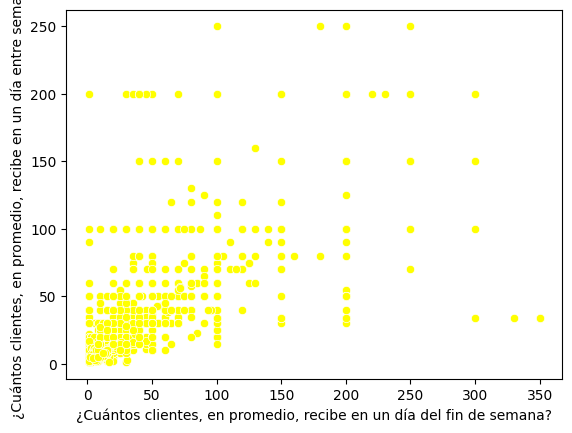

In [34]:
sns.scatterplot(x='¿Cuántos clientes, en promedio, recibe en un día del fin de semana?', y='¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="yellow", data=data)

In [ ]:
sns.scatterplot(x='En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?', y='¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="green", data=data)


In [ ]:
sns.scatterplot(x='En una escala de 1 a 10, ¿cómo evaluaría sus esfuerzos para reducir su impacto ambiental?', y='¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="orange", data=data)


In [ ]:
sns.scatterplot(x='En una escala de 1 a 10, ¿cómo evaluaría sus esfuerzos para reducir su impacto social?', y='¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="pink", data=data)

In [ ]:
sns.scatterplot(x='Equipo del entrevistador', y='¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="blue", data=data)
#sns.scatterplot(x='¿Cuántos clientes, en promedio, recibe en un día entre semana?', y='¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="red", data=data)
sns.scatterplot(x='¿Cuántos clientes, en promedio, recibe en un día del fin de semana?', y='¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="yellow", data=data)
sns.scatterplot(x='En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?', y='¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="green", data=data)
sns.scatterplot(x='En una escala de 1 a 10, ¿cómo evaluaría sus esfuerzos para reducir su impacto ambiental?', y='¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="orange", data=data)
sns.scatterplot(x='En una escala de 1 a 10, ¿cómo evaluaría sus esfuerzos para reducir su impacto social?', y='¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="pink", data=data)

In [40]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= data[['Equipo del entrevistador', '¿Cuántos clientes, en promedio, recibe en un día del fin de semana?','En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?','En una escala de 1 a 10, ¿cómo evaluaría sus esfuerzos para reducir su impacto ambiental?','En una escala de 1 a 10, ¿cómo evaluaría sus esfuerzos para reducir su impacto social?']]
Var_Dep= data['¿Cuántos clientes, en promedio, recibe en un día entre semana?']

In [41]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [42]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [43]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Equipo del entrevistador',
        '¿Cuántos clientes, en promedio, recibe en un día del fin de semana?',
        'En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?',
        'En una escala de 1 a 10, ¿cómo evaluaría sus esfuerzos para reducir su impacto ambiental?',
        'En una escala de 1 a 10, ¿cómo evaluaría sus esfuerzos para reducir su impacto social?'],
       dtype=object),
 'n_features_in_': 5,
 'coef_': array([ 0.52200054,  0.49312636,  0.51165034,  0.29807442, -0.04229185]),
 'rank_': 5,
 'singular_': array([1746.22157355,  105.00308151,  102.62510123,   55.1488076 ,
          46.69537577]),
 'intercept_': 8.456866028063853}

**Modelo matemático: y= 0.52200054x1 + 0.49312636x2 + 0.51165034x3 + 0.29807442x4 - 0.04229185x5 + 8.456866028063853**





In [44]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=data[['Equipo del entrevistador', '¿Cuántos clientes, en promedio, recibe en un día del fin de semana?','En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?','En una escala de 1 a 10, ¿cómo evaluaría sus esfuerzos para reducir su impacto ambiental?','En una escala de 1 a 10, ¿cómo evaluaría sus esfuerzos para reducir su impacto social?']])
y_pred

array([18.39581044, 56.2953738 , 27.88621957, ..., 33.77690051,
       43.48209931, 48.32877918])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data.insert(0, 'Predicciones', y_pred)
data

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='Equipo del entrevistador', y='¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="blue", data=data)
sns.scatterplot(x='Equipo del entrevistador', y='Predicciones', color="blue", data=data)

sns.scatterplot(x='¿Cuántos clientes, en promedio, recibe en un día del fin de semana?', y='¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="yellow", data=data)
sns.scatterplot(x='¿Cuántos clientes, en promedio, recibe en un día del fin de semana?', y='Predicciones', color="yellow", data=data)

sns.scatterplot(x='En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?', y='¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="green", data=data)
sns.scatterplot(x='En caso de tener un sistema de recolección ¿Cada cuánto pasa el camión de la basura por su negocio?', y='Predicciones', color="green", data=data)

sns.scatterplot(x='En una escala de 1 a 10, ¿cómo evaluaría sus esfuerzos para reducir su impacto ambiental?', y='¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="orange", data=data)
sns.scatterplot(x='En una escala de 1 a 10, ¿cómo evaluaría sus esfuerzos para reducir su impacto ambiental?', y='Predicciones', color="orange", data=data)

sns.scatterplot(x='En una escala de 1 a 10, ¿cómo evaluaría sus esfuerzos para reducir su impacto social?', y='¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="pink", data=data)
sns.scatterplot(x='En una escala de 1 a 10, ¿cómo evaluaría sus esfuerzos para reducir su impacto social?', y='Predicciones', color="pink", data=data)

In [ ]:
sns.scatterplot(x='En una escala de 1 a 10, ¿cómo evaluaría sus esfuerzos para reducir su impacto social?', y='¿Cuántos clientes, en promedio, recibe en un día entre semana?', color="pink", data=data)
sns.scatterplot(x='En una escala de 1 a 10, ¿cómo evaluaría sus esfuerzos para reducir su impacto social?', y='Predicciones', color="red", data=data)

In [47]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.40937666390128935

In [53]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.6398254948822291

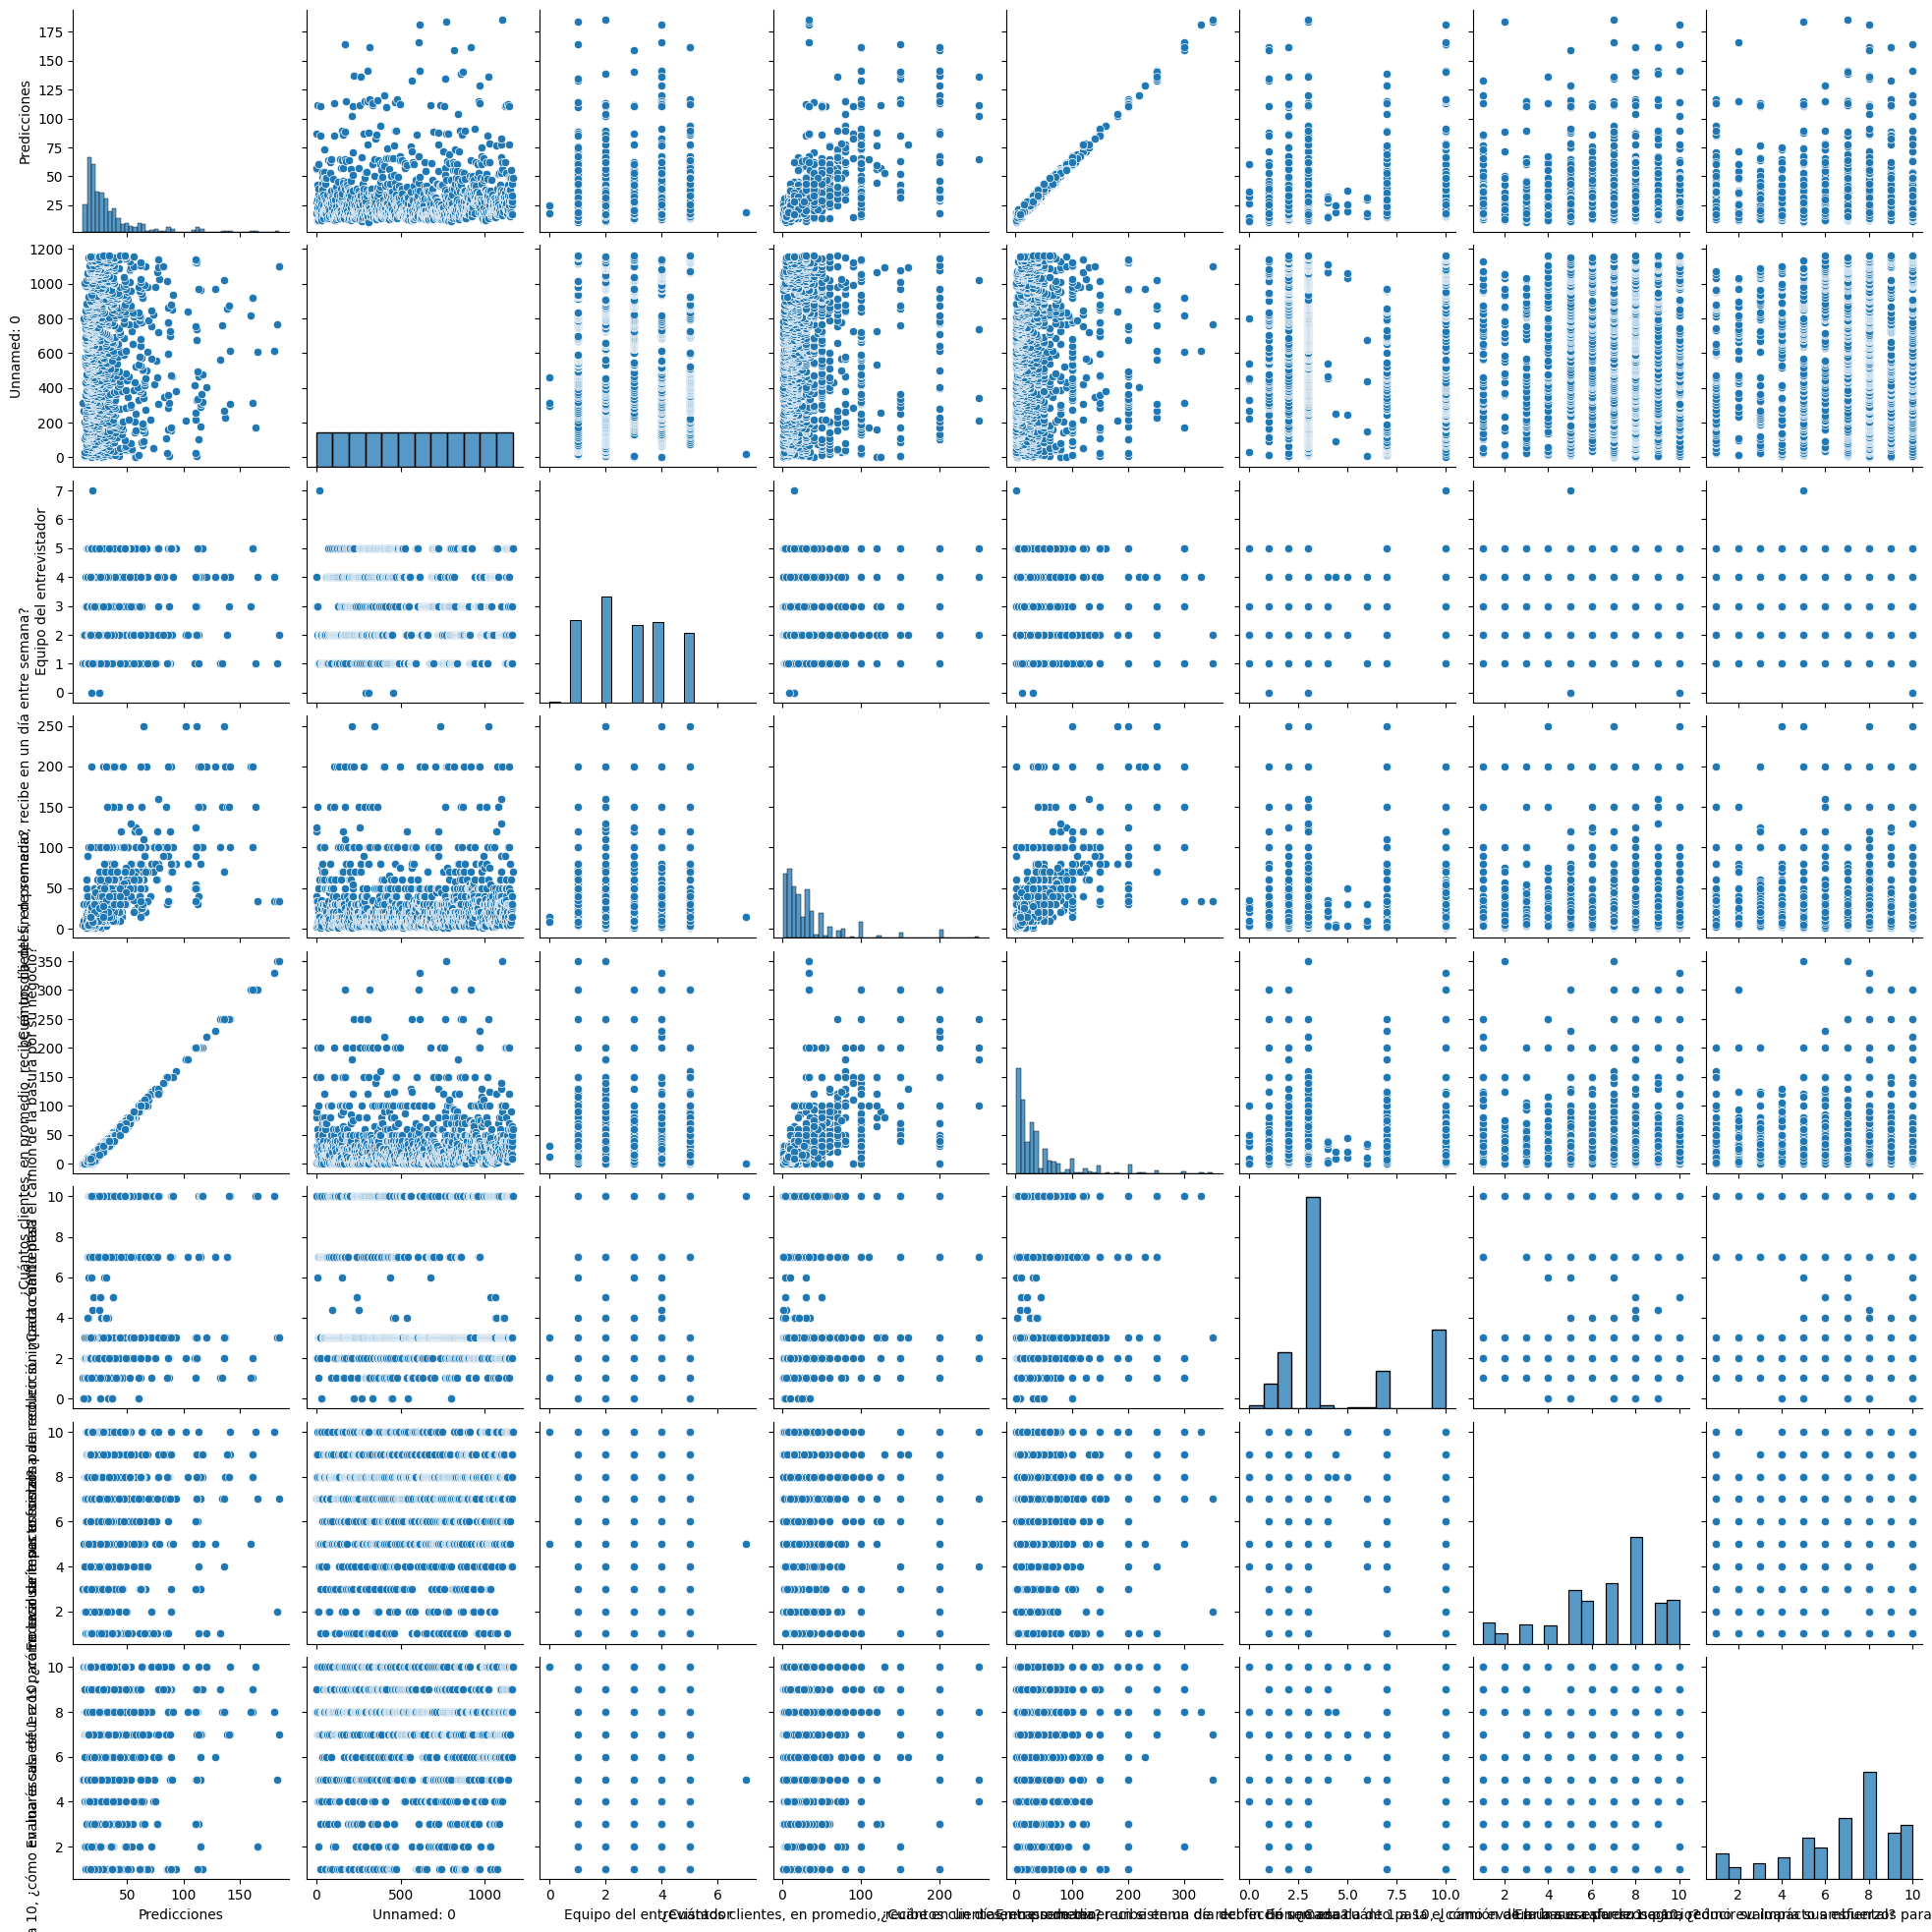

In [56]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(data)

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=data.corr()
Corr_Factors

In [ ]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

<Axes: >

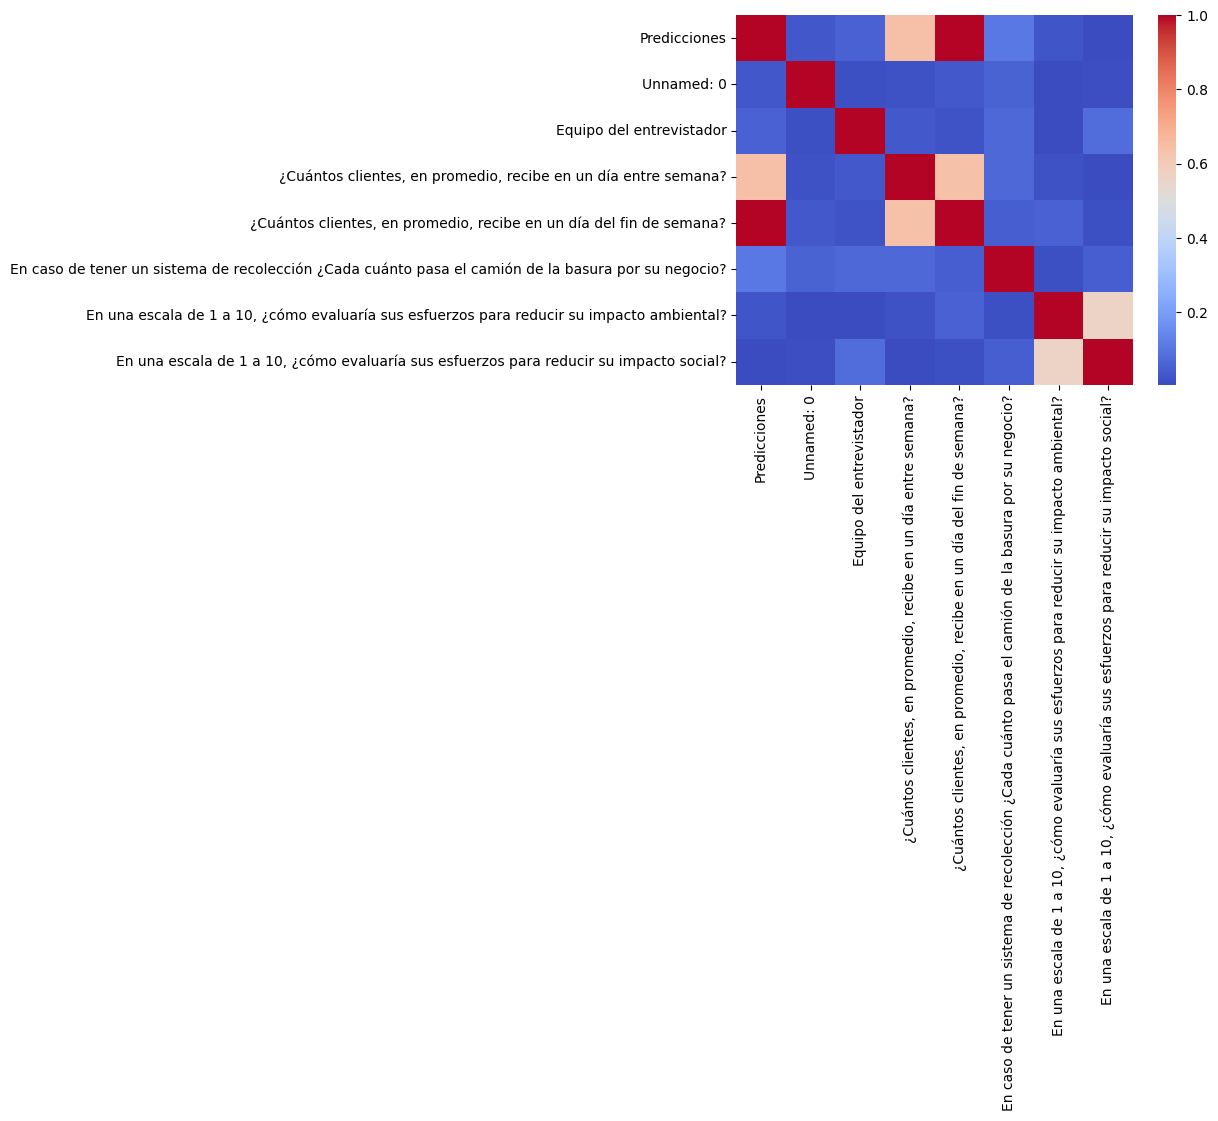

In [59]:
#Graficamos el mapa de calor de los coeficientes de correlación
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'coolwarm')
Heat_Map

<Axes: >

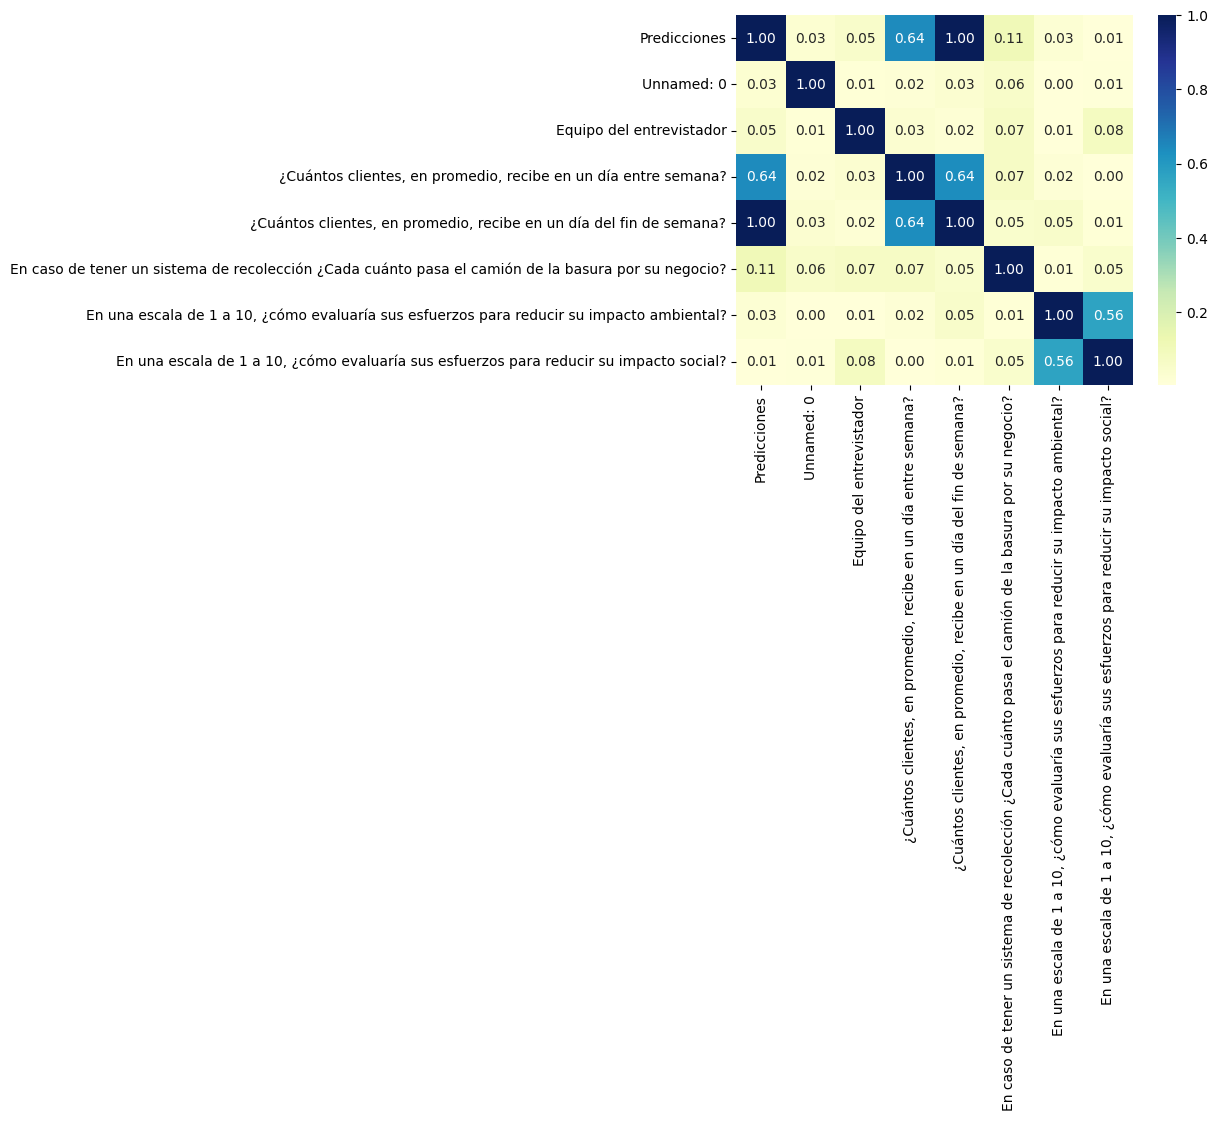

In [60]:
#Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")
Heat_Map